AICP INTERNSHIP WEEK 06

BIRTH RATE ANALYSIS

In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv("births.csv")

# Explore the dataset
print("Dataset info:")
print(df.info())
print("\nSample data:")
print(df.head())

# Add a new column "Decade"
df['Decade'] = (df['year'] // 10) * 10

# Perform exploratory data analysis (EDA)
print("\nDecade-wise summary:")
decade_summary = df.groupby('Decade').agg({'births': 'sum'}).reset_index()
print(decade_summary)

# Save the updated dataset with the new column
df.to_csv("births_with_decade.csv", index=False)


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    15547 non-null  int64  
 1   month   15547 non-null  int64  
 2   day     15067 non-null  float64
 3   gender  15547 non-null  object 
 4   births  15547 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 607.4+ KB
None

Sample data:
   year  month  day gender  births
0  1969      1  1.0      F    4046
1  1969      1  1.0      M    4440
2  1969      1  2.0      F    4454
3  1969      1  2.0      M    4548
4  1969      1  3.0      F    4548

Decade-wise summary:
   Decade    births
0    1960   3600206
1    1970  33384625
2    1980  37553803
3    1990  39900007
4    2000  37335737


Q.2: Show the descriptive statistics of the data.

In [4]:
# Display descriptive statistics
print("Descriptive Statistics:")
print(df.describe())


Descriptive Statistics:
               year         month           day         births        Decade
count  15547.000000  15547.000000  15067.000000   15547.000000  15547.000000
mean    1979.037435      6.515919     17.769894    9762.293561   1974.544285
std        6.728340      3.449632     15.284034   28552.465810      6.789583
min     1969.000000      1.000000      1.000000       1.000000   1960.000000
25%     1974.000000      4.000000      8.000000    4358.000000   1970.000000
50%     1979.000000      7.000000     16.000000    4814.000000   1970.000000
75%     1984.000000     10.000000     24.000000    5289.500000   1980.000000
max     2008.000000     12.000000     99.000000  199622.000000   2000.000000


Q.3: Check if your data contains any missing values


In [5]:
# Check for missing values
missing_values = df.isnull().sum()

# Display columns with missing values, if any
print("Missing Values:")
print(missing_values)


Missing Values:
year        0
month       0
day       480
gender      0
births      0
Decade      0
dtype: int64


Q.4: What is the trend of male & female births every decade?

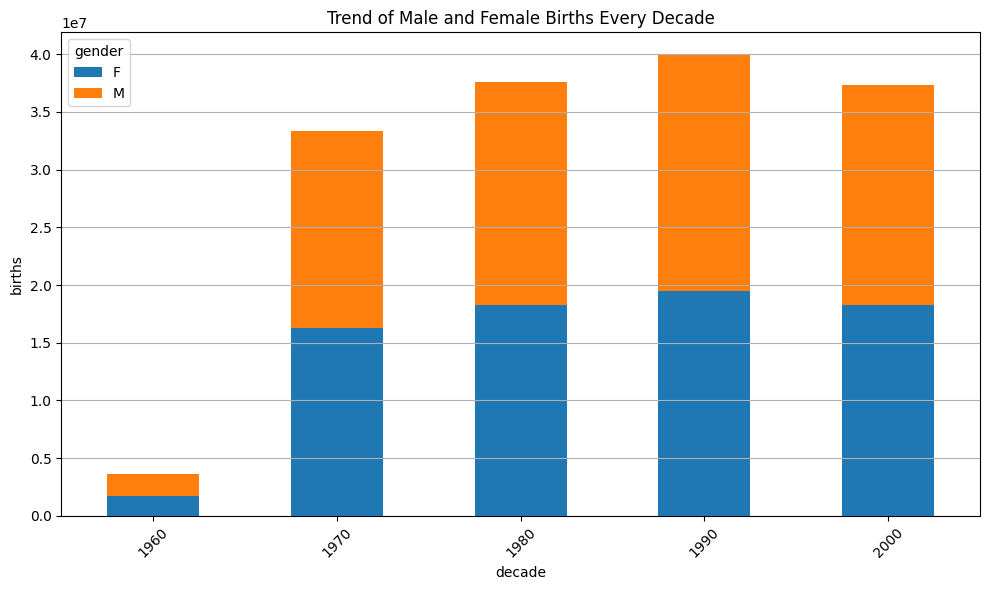

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv("births_with_decade.csv")

# Add a new column "Decade"
df['decade'] = (df['year'] // 10) * 10

# Group data by decade and gender, and calculate total births
decade_gender_births = df.groupby(['decade', 'gender']).agg({'births': 'sum'}).reset_index()

# Pivot the data for easier plotting
pivot_table = decade_gender_births.pivot(index='decade', columns='gender', values='births')

# Plot the trend of male and female births every decade
pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Trend of Male and Female Births Every Decade')
plt.xlabel('decade')
plt.ylabel('births')
plt.xticks(rotation=45)
plt.legend(title='gender')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Q.5: To remove outliers from dataset following techinque to include only those values that fall within 5
standard deviations from the mean.This is a common statistical technique used to focus on the central
tendency of the data while excluding extreme values.Use this technique to remove outliers.

In [36]:
import pandas as pd

# Read the CSV file
df = pd.read_csv("births.csv")

# Filter out rows with invalid day values (greater than 31)
df = df[df['day'] <= 31]

# Calculate the mean and standard deviation of the 'births' column
mean_births = df['births'].mean()
std_births = df['births'].std()

# Define the lower and upper bounds for acceptable values
lower_bound = mean_births - 5 * std_births
upper_bound = mean_births + 5 * std_births

# Filter the dataset to include only rows where 'births' falls within the acceptable range
filtered_df = df[(df['births'] >= lower_bound) & (df['births'] <= upper_bound)]

# Show the filtered dataset
print(filtered_df)


       year  month   day gender  births
0      1969      1   1.0      F    4046
1      1969      1   1.0      M    4440
2      1969      1   2.0      F    4454
3      1969      1   2.0      M    4548
4      1969      1   3.0      F    4548
...     ...    ...   ...    ...     ...
15062  1988     12  29.0      M    5944
15063  1988     12  30.0      F    5742
15064  1988     12  30.0      M    6095
15065  1988     12  31.0      F    4435
15066  1988     12  31.0      M    4698

[14610 rows x 5 columns]


Q.6: Plot births by weekday for several decades. Write down your observation

<ipython-input-15-dc05bb4883ca>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day'] = df['day'].astype(int)


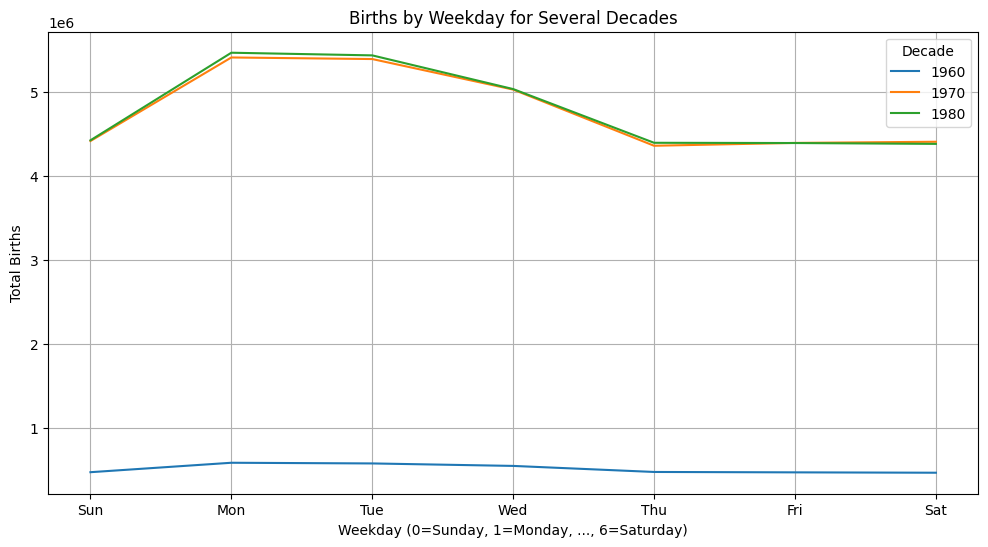

In [15]:
# Drop rows with non-finite values in the 'day' column
df = df.dropna(subset=['day'])

# Convert 'day' column to integer type
df['day'] = df['day'].astype(int)

# Group data by decade and weekday, and calculate total births
decade_weekday_births = df.groupby(['Decade', df['day'] % 7]).agg({'births': 'sum'}).reset_index()
decade_weekday_births.columns = ['Decade', 'Weekday', 'Total Births']

# Plot births by weekday for several decades
plt.figure(figsize=(12, 6))

# Plot each decade separately
for decade, data in decade_weekday_births.groupby('Decade'):
    plt.plot(data['Weekday'], data['Total Births'], label=str(decade))

plt.title('Births by Weekday for Several Decades')
plt.xlabel('Weekday (0=Sunday, 1=Monday, ..., 6=Saturday)')
plt.ylabel('Total Births')
plt.xticks(range(7), ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.legend(title='Decade', loc='upper right')
plt.grid(True)
plt.show()


Q.7: Group the data by month and day separately

In [16]:
# Group data by month and calculate total births for each month
monthly_births = df.groupby('month').agg({'births': 'sum'}).reset_index()

# Group data by day and calculate total births for each day
daily_births = df.groupby('day').agg({'births': 'sum'}).reset_index()

# Display the grouped data
print("Monthly Births:")
print(monthly_births)

print("\nDaily Births:")
print(daily_births)


Monthly Births:
    month   births
0       1  5759568
1       2  5363417
2       3  5868651
3       4  5561317
4       5  5785602
5       6  5759233
6       7  6220777
7       8  6310276
8       9  6206785
9      10  6056193
10     11  5696035
11     12  5905087

Daily Births:
    day   births
0     1  2286854
1     2  2303168
2     3  2309087
3     4  2286588
4     5  2296951
5     6  2308073
6     7  2314081
7     8  2322376
8     9  2315055
9    10  2327197
10   11  2319561
11   12  2322956
12   13  2290896
13   14  2335551
14   15  2333426
15   16  2332456
16   17  2335458
17   18  2334949
18   19  2331183
19   20  2337631
20   21  2329563
21   22  2317711
22   23  2305174
23   24  2290500
24   25  2283975
25   26  2300208
26   27  2314088
27   28  2328630
28   29  2189278
29   30  2141788
30   31  1342126
31   99     6403


Q.8: Focusing on the month and day only, you have a time series reflecting the average number of
births by date of the year. From this, plot the data.

In [38]:
import pandas as pd

# Read the birth dataset from the birth.csv file
df = pd.read_csv("births.csv")

# Filter out rows with day values greater than 31
df = df[df['day'] <= 31]

# Save the filtered dataset to a new CSV file
df.to_csv("filtered_births.csv", index=False)


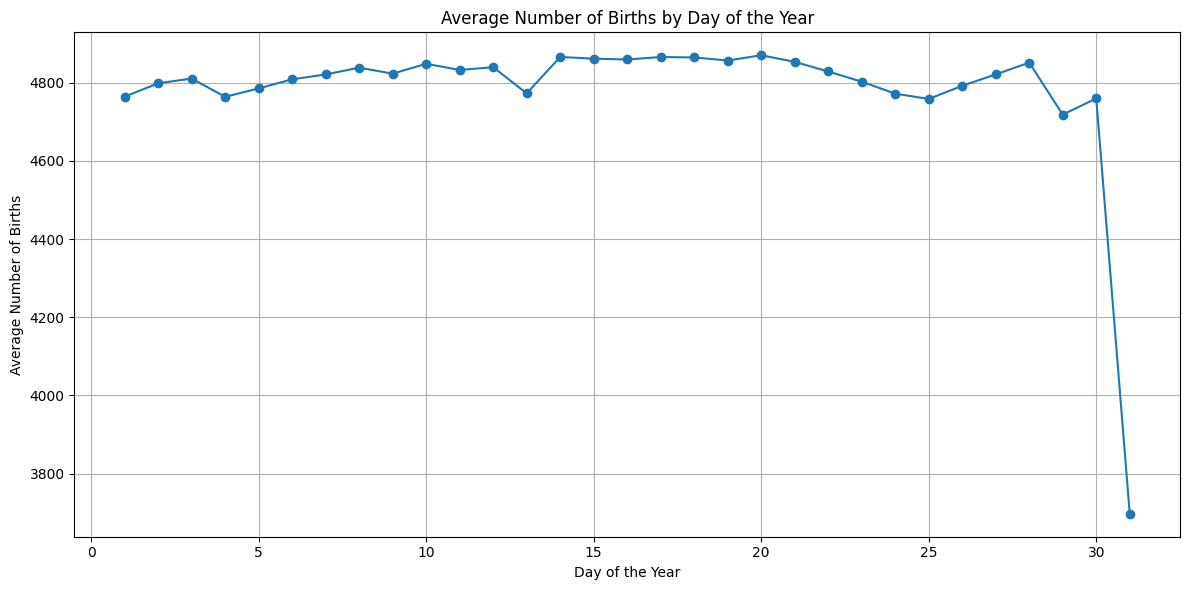

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the filtered dataset from the filtered_birth.csv file
df = pd.read_csv("filtered_births.csv")

# Convert 'day' column from float to integer
df['day'] = df['day'].astype(int)

# Group data by day and calculate the average number of births for each day
daily_avg_births = df.groupby('day').agg({'births': 'mean'}).reset_index()

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(daily_avg_births['day'], daily_avg_births['births'], marker='o', linestyle='-')
plt.title('Average Number of Births by Day of the Year')
plt.xlabel('Day of the Year')
plt.ylabel('Average Number of Births')
plt.grid(True)
plt.tight_layout()
plt.show()
